# Assignment #0 - Data and Visualization

<font color="red"> <b> Due: Sep 25 (Friday) 11:00 pm </b> </font>


<font color="blue"> Akshay Patil </font>


# Introduction

In this assignment we are dealing with two types of dataset. First dataset can be used for classification and second dataset can be used for regression. The differnce between classification and regression is that the output for former is discrete and for latter it is continuous. For classification we can use logit, probit model and for regression we can linear model and its variants.

# I. Classification data
##  Bank Loan Status Dataset
The data is obtained from kaggle website. The link for the data set is: https://www.kaggle.com/zaurbegiev/my-dataset  The dataset contains following features: Current Loan amount, Credit score, Annual Income, Years in current Job, Monthly debt and many more. There are total 19 features in the dataset. The data set contains more than 100,000 instances but mostly filled with null values and duplicate values. [1]

# Reading the data
The data set is csv file. It is uploaded using pandas module. The data set contains more than 100,000 instances and 19 features in total. This data set contains Loan status as one of the feature which we will be predicting given new instance.

In [1]:
#Importing modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('credit_train.csv')
import seaborn

In [2]:
df

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220.0,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100509,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Pre Processing of the data.
As we can see there are NaN values present. There are also duplicate values present. So we delete those instances, and we are left with almost 30,000 instances

In [3]:
#Dropping Na values
df = df.dropna()

# Checking for duplicates in Loan ID number and dropping the duplicates

df = df.drop_duplicates(subset = ["Loan ID"])
df.shape


(29490, 19)

 
On further observation it can be noticed that there are almost 2000 credit scores which are above 850 which is not possible. Upon closer look we can see they are multiplied by 10 , so we divide those particular scores by 10 and replace them in the model 

In [4]:
(df['Credit Score']> 850).value_counts()
#  False    100514
#  Name: Credit Score, dtype: int64

df['Credit Score'] = df['Credit Score'].apply( lambda score: 
                                              (score/10) if score > 850 else score)

As there are lot of instances we will be considering only Long term loans for this model.
The string values in 'Loan status', 'Number of years worked' and others were replaced with their appropriate numerical counterpart. Loan ID and Customer ID are dropped from the model as they are no longer needed.

In [5]:
#In this project we will be considering Loans classified as Long Term,
#so we will be left with around 8000 data set

df = df[df['Term'].str.contains("Long Term")]
df.shape

(7923, 19)

In [6]:
#We drop Loan ID, Customer ID, and Term

df = df.drop(columns = ['Loan ID', 'Customer ID','Term', "Purpose"])


In [7]:
#"Now we replace the strings in particular columns with their numerical counterpart"
df['Loan Status'] = df['Loan Status'].replace({'Charged Off':0, 'Fully Paid':1})

df['Years in current job'] = df['Years in current job'].replace(
    {'10+ years':0, 
     '2 years':1,
    '3 years': 3,
    '< 1 year':0,
    '5 years':5,
    '1 year':1,
    '6 years':6,
    '7 years':7,
    '4 years':4,
    '8 years':8,
    '9 years':9})

df['Home Ownership'] = df['Home Ownership'].replace(
    {'Home Mortgage':1, 
     'Rent':2,
    'Own Home':3,
    'HaveMortgage':4,
})
df.head()

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Home Ownership,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
17,1,666204.0,723.0,1821967.0,0,1,17612.24,22.0,34.0,15.0,0.0,813694.0,2004618.0,0.0,0.0
20,0,317108.0,687.0,1133274.0,8,2,9632.81,17.4,53.0,4.0,0.0,60287.0,126940.0,0.0,0.0
25,1,465410.0,688.0,1722654.0,3,2,15647.45,22.3,30.0,7.0,0.0,107559.0,488356.0,0.0,0.0
40,0,688468.0,682.0,1494616.0,0,2,14697.07,16.6,50.0,8.0,0.0,343995.0,843854.0,0.0,0.0
44,1,311762.0,680.0,2211657.0,4,1,44601.74,14.5,15.0,11.0,0.0,213921.0,509652.0,0.0,0.0


# Data Visualization
We plot instances according to the number of years they have worked 
and also plot number of people who defaulted against who did not.

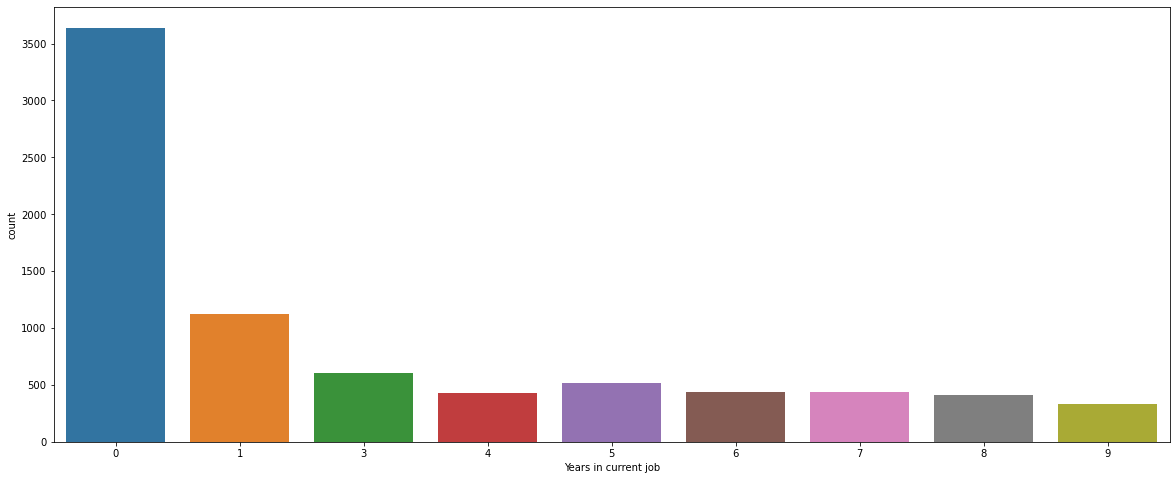

In [8]:
plt.figure(figsize = (20,8))
seaborn.countplot(df['Years in current job'])
plt.show()

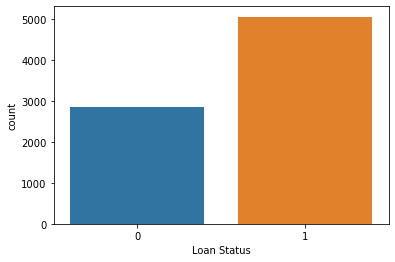

In [9]:
seaborn.countplot(df['Loan Status'])
plt.show()

# II. Regression data
### Air Quality data
The data is obtained from UCI repository. It can be found here:https://archive.ics.uci.edu/ml/datasets/Air+Quality# Dataset contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. The data set contains around 10,000 instances and 15 features. Basically 5 metal oxide chemical sensors were deployed to target particular chemicals. [2]

Sensors : Chemicals(Targeted)

Tin Oxide : CO

Titania : NMHC

Tungsten Oxide : NOx

Tungsten Oxide : NO2

Indium Oxide : O3

In [10]:
#Importing modules
import pandas as pd
import numpy as np
import seaborn
import matplotlib.pyplot as plt

# Reading the data
The data set is excel file. It is uploaded using pandas module. The data set contains around 10,0000 instances and 15 features in total. This data set can be used to regress the amount of any particular chemical sensed by a sensor in the air like benzene C6H6 for example. Ground Truth horly average for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) is provided by a co-located reference certified analyzer.

Following is the attribute information taken directly from UCI website 
Attribute Information: [3]

We combine the date and time column and make it as a index.( See dataframe info below)
 
1 Date (DD/MM/YYYY) _Time (HH.MM.SS) 

2 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 

3 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) 

4 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 

5 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 

6 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) 

7 True hourly averaged NOx concentration in ppb (reference analyzer) 

8 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 

9 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) 

10 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) 

11 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 

12 Temperature in Â°C 

13 Relative Humidity (%) 

14 AH Absolute Humidity

In [11]:
df = pd.read_excel('AirQualityUCI.xlsx', parse_dates = [['Date', 'Time']])
df = df.set_index('Date_Time')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1023.4 KB


In [12]:
df.head(2)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487


# Pre Processing of the data.
This dataset contains (-200) in place of missing values. If we delete this observation we will be left with very few data. so we replaced this missing values with their particular means.

In [13]:
df = df.replace({-200 : np.nan})

In [14]:
df.mean()[:3,] # Two values shown for reference

CO(GT)            2.152750
PT08.S1(CO)    1099.707856
NMHC(GT)        218.811816
dtype: float64

In [15]:
#Missing values are filled with their respective means and now our dataset is ready for visualization
df = df.fillna(df.mean())

# Data Visualization
In the first fig we plot the means for each features

In second plot we compare True hourly averaged concentration of CO with CO sensed by the sensor

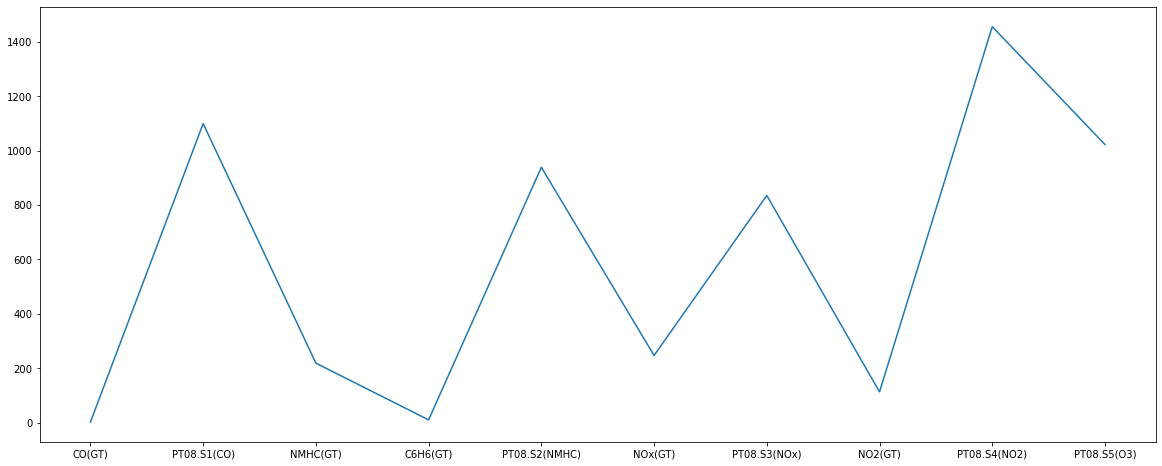

In [16]:
#Fig 1
plt.figure(figsize = (20,8))
plt.plot(df.mean()[0:10,])
plt.show()

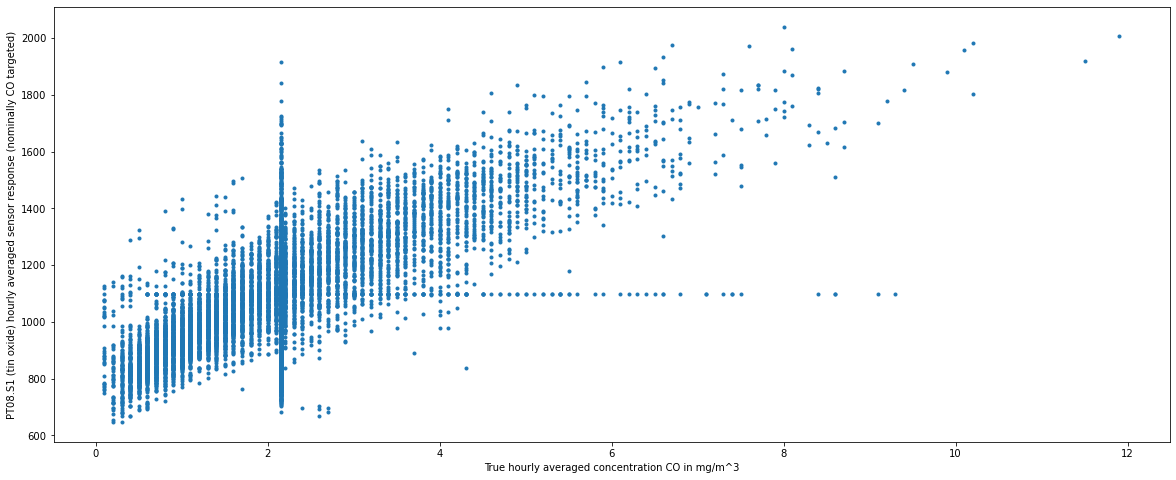

In [17]:
#Fig 2
plt.figure(figsize = (20,8))
plt.plot(df['CO(GT)'],df['PT08.S1(CO)'], '.')
plt.xlabel("True hourly averaged concentration CO in mg/m^3")
plt.ylabel("PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)")
plt.show()

# III. Conclusions

This assignment was really fun. We had to search for own dataset, clean it and make it ready to run any model. Also, I got chance to learn many things about pandas library. 

# References

[1] https://www.kaggle.com/zaurbegiev/my-dataset

[2][3]https://archive.ics.uci.edu/ml/datasets/Air+Quality# 

In [18]:
df


,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150.000000,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.600,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112.000000,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.300,47.700000,0.725487
2004-03-10 20:00:00,2.2,1402.00,88.000000,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.900,53.975000,0.750239
2004-03-10 21:00:00,2.2,1375.50,80.000000,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.000,60.000000,0.786713
2004-03-10 22:00:00,1.6,1272.25,51.000000,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.150,59.575001,0.788794
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-04-04 10:00:00,3.1,1314.25,218.811816,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250000,0.756824
2005-04-04 11:00:00,2.4,1162.50,218.811816,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725000,0.711864
2005-04-04 12:00:00,2.4,1142.00,218.811816,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350000,0.640649


## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine without any error. 
**You don't need to run any ML algorithm.** 
This assignment only asks reading, visualizing, and writing your observations from it.

**Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing.** 


Points | | Description
--|--|:--
10 | Introduction  
80 | Data and Visualization | 
 | 10| Introduction of data for regression & source (cite related articles)
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
 | 10| Introduction of data for Classification & source (cite related articles)
 | 5| Reading the data 
 | 5| Preprocessing of the data 
 | 10| Visualization of the data 
 | 10| Preliminary observation 
5 | Conclusions 
5 | References 

